<a href="https://colab.research.google.com/github/gui98araujo/nflAnalytics/blob/main/NFL_WEB_SCRAPING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nesse projeto será realizado uma coleta de dados da NFL utilizando ferramentas como webScraping em um site muito utlizado por jogadores de fantasy e estudiosos de futebol americano (pro-football-refeence).

Autor: Guilherme Araujo

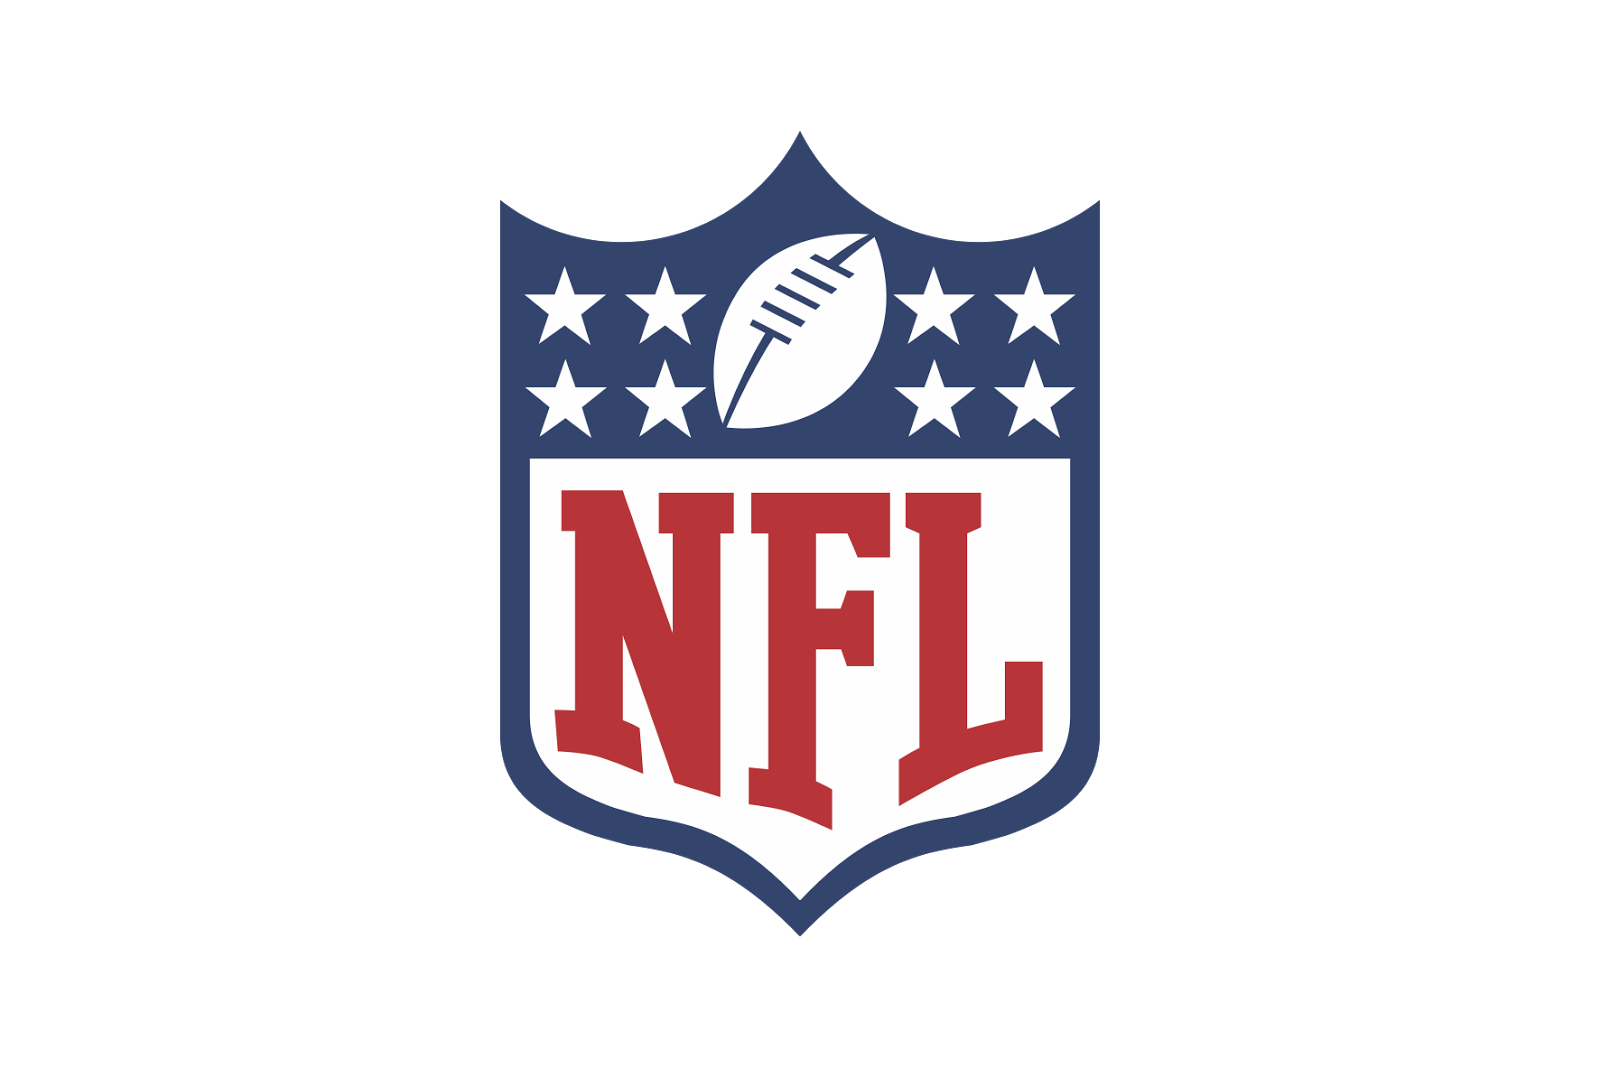

# 0.  Importando Bibliotecas

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# 1. Extração dos dados

In [ ]:
def player_csv(year):

    url = "https://www.pro-football-reference.com/years/{}/fantasy.htm".format(year)
    html = urlopen(url)
    soup = BeautifulSoup(html)

    headers = [th.getText() for th in soup.findAll('tr')[1].findAll('th')]
    headers = headers[1:]

    rows = soup.findAll('tr', class_ = lambda table_rows: table_rows != "thead")
    player_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
    player_stats = player_stats[2:]

    stats = pd.DataFrame(player_stats, columns = headers)

    stats = stats.replace(r'', 'N/A', regex=True)
    stats['Year'] = year

    stats.to_csv('{}playerstats.csv'.format(year))

    print("Player data for the year {} has been created.".format(year))

Gerando dataset com as estatísticas dos jogadores ofensivos que passaram pela NFL até 2022.

In [ ]:
#for i in range(1970, 2008):
  #player_csv(i)
#for i in range(2008, 2023):
  #player_csv(i)

Player data for the year 1970 has been created.
Player data for the year 1971 has been created.
Player data for the year 1972 has been created.
Player data for the year 1973 has been created.
Player data for the year 1974 has been created.
Player data for the year 1975 has been created.
Player data for the year 1976 has been created.
Player data for the year 1977 has been created.
Player data for the year 1978 has been created.
Player data for the year 1979 has been created.
Player data for the year 1980 has been created.
Player data for the year 1981 has been created.
Player data for the year 1982 has been created.
Player data for the year 1983 has been created.
Player data for the year 1984 has been created.
Player data for the year 1985 has been created.
Player data for the year 1986 has been created.
Player data for the year 1987 has been created.
Player data for the year 1988 has been created.
Player data for the year 1989 has been created.
Player data for the year 1990 has been c

HTTPError: ignored

Como existe um timeout de execução, não é possível extrair todos os dados de uma vez só, por isso dividimos entre 1970 até 2007 e de 2008 em diante. Para obter os dados da segunda etapa é necessário aguardar um determinado tempo que pode ser encontrado ao rodar o código abaixo.

In [ ]:
import requests

url = 'https://www.pro-football-reference.com/years/{}/fantasy.htm'

response = requests.get(url)

if response.status_code == 429:
    # Verifique se o cabeçalho "Retry-After" está presente na resposta
    if 'Retry-After' in response.headers:
        retry_after = response.headers['Retry-After']
        print(f'É necessário esperar {retry_after} segundos antes de fazer outra solicitação.')
    else:
        print('O servidor não forneceu informações sobre o tempo de espera.')
else:
    # Trate outras respostas (200 OK, 404 Not Found, etc.) aqui
    print('A solicitação foi bem-sucedida ou resultou em outro código de resposta.')

# Lembre-se de manipular a lógica de espera antes de fazer a próxima solicitação.


É necessário esperar 3560 segundos antes de fazer outra solicitação.


In [ ]:
import pandas as pd
import os

# Diretório onde estão localizados os arquivos CSV
diretorio = '/content/'

# Lista para armazenar os DataFrames lidos de cada arquivo
dataframes = []

# Loop para ler cada arquivo CSV
for ano in range(1970, 2023):
    arquivo_csv = f'{diretorio}{ano}playerstats.csv'
    if os.path.exists(arquivo_csv):
        df = pd.read_csv(arquivo_csv)
        dataframes.append(df)

# Junte todos os DataFrames em um único DataFrame
df = pd.concat(dataframes, ignore_index=True)

# Agora 'df' contém todos os dados de 1970 a 2022 em um único DataFrame

df.to_csv('nfl')

In [ ]:
df = pd.read_csv('/content/nfl')

In [ ]:
df.drop('Unnamed: 0.1', axis =1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28198 entries, 0 to 28197
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28198 non-null  int64  
 1   Player      28198 non-null  object 
 2   Tm          28198 non-null  object 
 3   FantPos     25051 non-null  object 
 4   Age         28198 non-null  int64  
 5   G           28198 non-null  int64  
 6   GS          28198 non-null  int64  
 7   Cmp         28187 non-null  float64
 8   Att         28187 non-null  float64
 9   Yds         28187 non-null  float64
 10  TD          28187 non-null  float64
 11  Int         28186 non-null  float64
 12  Att.1       28187 non-null  float64
 13  Yds.1       28187 non-null  float64
 14  Y/A         15412 non-null  float64
 15  TD.1        28187 non-null  float64
 16  Rec         28187 non-null  float64
 17  Yds.2       28187 non-null  float64
 18  Y/R         20447 non-null  float64
 19  TD.2        28187 non-nul

In [ ]:
df.describe()

,Unnamed: 0,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,...,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year,Tgt
count,28198.000000,28198.000000,28198.000000,28198.000000,28187.000000,28187.000000,28187.000000,28187.000000,28186.000000,28187.000000,...,535.000000,24621.000000,25235.000000,25220.000000,25221.000000,3891.000000,28198.000000,4134.000000,28198.000000,16896.000000
mean,272.937442,26.303000,11.169728,5.215086,16.295633,27.857417,193.225352,1.165218,0.955332,25.338028,...,1.517757,57.966614,74.655815,78.930075,66.689188,45.772038,76.584722,39.500000,1997.942053,30.078658
std,166.869913,3.312089,5.037222,5.758638,59.715210,99.225413,706.149496,4.552366,3.351602,58.091635,...,0.862864,64.209141,77.891422,80.863148,71.721640,39.036456,53.808617,22.517534,15.014340,37.929345
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,...,1.000000,-10.000000,-8.800000,-4.000000,-9.300000,1.000000,1.000000,1.000000,1970.000000,0.000000
25%,133.000000,24.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,9.000000,12.300000,13.000000,10.700000,16.000000,33.000000,20.000000,1986.000000,2.000000
50%,266.000000,26.000000,13.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,34.000000,46.600000,51.100000,40.300000,36.000000,67.000000,39.500000,1999.000000,14.000000
75%,400.000000,28.000000,16.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,...,2.000000,86.000000,116.100000,122.600000,102.000000,65.000000,113.000000,59.000000,2011.000000,46.000000
max,881.000000,45.000000,17.000000,17.000000,490.000000,733.000000,5477.000000,55.000000,35.000000,416.000000,...,8.000000,425.000000,481.100000,488.100000,453.100000,278.000000,307.000000,78.000000,2022.000000,208.000000


In [ ]:
df[df['Player'].str.contains('\*', regex=True)]

,Unnamed: 0,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year,Tgt
0,0,Gene Washington*+,SFO,WR,23,13,13,0.0,0.0,0.0,...,NaN,182.0,235.0,238.0,208.5,138.0,1,1.0,1970,NaN
1,1,Dick Gordon*+,CHI,WR,26,14,14,0.0,0.0,0.0,...,NaN,180.0,251.3,255.3,215.8,136.0,2,2.0,1970,NaN
2,2,Ron Johnson*+,NYG,RB,23,14,14,0.0,0.0,0.0,...,NaN,218.0,266.4,274.9,242.4,135.0,1,3.0,1970,NaN
3,3,Gary Garrison*,SDG,WR,26,14,14,0.0,0.0,0.0,...,NaN,173.0,217.3,220.3,195.3,128.0,3,4.0,1970,NaN
4,4,MacArthur Lane*,STL,RB,28,14,14,0.0,0.0,0.0,...,NaN,210.0,242.2,249.2,226.2,126.0,2,5.0,1970,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27780,232,Jamal Agnew*,JAX,WR,27,15,0,0.0,0.0,0.0,...,NaN,47.0,70.3,73.3,58.8,NaN,92,NaN,2022,30.0
27821,273,Kyle Juszczyk*,SFO,RB,31,16,12,0.0,0.0,0.0,...,NaN,35.0,53.6,56.6,44.1,NaN,73,NaN,2022,23.0
27975,427,Patrick Ricard*,BAL,RB,28,17,16,0.0,0.0,0.0,...,NaN,9.0,20.0,20.0,14.5,NaN,119,NaN,2022,13.0
28136,588,Justin Hardee*,NYJ,NaN,28,17,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,227,NaN,2022,0.0


In [ ]:
df[df['Player'].str.contains('\+', regex=True)]

,Unnamed: 0,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year,Tgt
0,0,Gene Washington*+,SFO,WR,23,13,13,0.0,0.0,0.0,...,NaN,182.0,235.0,238.0,208.5,138.0,1,1.0,1970,NaN
1,1,Dick Gordon*+,CHI,WR,26,14,14,0.0,0.0,0.0,...,NaN,180.0,251.3,255.3,215.8,136.0,2,2.0,1970,NaN
2,2,Ron Johnson*+,NYG,RB,23,14,14,0.0,0.0,0.0,...,NaN,218.0,266.4,274.9,242.4,135.0,1,3.0,1970,NaN
6,6,John Brodie*+,SFO,QB,35,14,14,223.0,378.0,2941.0,...,NaN,208.0,207.5,221.0,217.5,109.0,1,7.0,1970,NaN
9,9,Larry Brown*+,WAS,RB,23,13,13,0.0,0.0,0.0,...,NaN,183.0,219.6,228.6,201.1,94.0,3,10.0,1970,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27549,1,Josh Jacobs*+,LVR,RB,24,17,17,0.0,0.0,0.0,...,NaN,275.0,328.3,335.3,301.8,127.0,1,2.0,2022,64.0
27552,4,Justin Jefferson*+,MIN,WR,23,17,17,2.0,2.0,34.0,...,NaN,241.0,368.7,371.7,304.7,119.0,1,5.0,2022,184.0
27555,7,Travis Kelce*+,KAN,TE,33,17,17,0.0,0.0,0.0,...,NaN,206.0,316.3,320.3,261.3,114.0,1,8.0,2022,152.0
27556,8,Davante Adams*+,LVR,WR,30,17,17,0.0,0.0,0.0,...,NaN,236.0,335.5,338.5,285.5,114.0,2,9.0,2022,180.0


In [ ]:
df[df['Player'].str.contains('Tom Brady')]

,Unnamed: 0,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year,Tgt
14989,474,Tom Brady,NWE,QB,23,1,0,1.0,3.0,6.0,...,NaN,NaN,0.2,0.2,0.2,NaN,71,NaN,2000,0.0
15157,85,Tom Brady*,NWE,QB,24,15,14,264.0,413.0,2843.0,...,NaN,162.0,163.3,181.3,174.8,NaN,20,NaN,2001,1.0
15667,52,Tom Brady,NWE,QB,25,16,16,373.0,601.0,3764.0,...,2.0,246.0,245.6,270.6,259.6,24.0,10,53.0,2002,0.0
16269,79,Tom Brady,NWE,QB,26,16,16,317.0,527.0,3620.0,...,NaN,215.0,215.1,235.1,227.1,NaN,13,NaN,2003,0.0
16849,66,Tom Brady*,NWE,QB,27,16,16,288.0,474.0,3692.0,...,NaN,226.0,226.5,247.5,240.5,8.0,11,67.0,2004,0.0
17397,23,Tom Brady*,NWE,QB,28,16,16,334.0,530.0,4110.0,...,NaN,249.0,249.3,269.3,263.3,53.0,2,24.0,2005,0.0
17992,31,Tom Brady,NWE,QB,29,16,16,319.0,516.0,3529.0,...,2.0,219.0,219.4,241.4,231.4,35.0,6,32.0,2006,0.0
18545,0,Tom Brady*+,NWE,QB,30,16,16,398.0,578.0,4806.0,...,NaN,390.0,390.0,405.0,398.0,186.0,1,1.0,2007,0.0
19570,431,Tom Brady,NWE,QB,31,1,1,7.0,11.0,76.0,...,NaN,3.0,3.0,3.0,3.0,NaN,59,NaN,2008,0.0
19754,37,Tom Brady*,NWE,QB,32,16,16,371.0,565.0,4398.0,...,1.0,270.0,270.3,288.3,283.3,42.0,7,38.0,2009,0.0


# 2. Preenchendo dados nulos

In [ ]:
# Identifique as colunas numéricas
colunas_numericas = df.select_dtypes(include=[np.number]).columns

# Preencha os valores vazios nas colunas numéricas com 0
df[colunas_numericas] = df[colunas_numericas].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28198 entries, 0 to 28197
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28198 non-null  int64  
 1   Player      28198 non-null  object 
 2   Tm          28198 non-null  object 
 3   FantPos     25051 non-null  object 
 4   Age         28198 non-null  int64  
 5   G           28198 non-null  int64  
 6   GS          28198 non-null  int64  
 7   Cmp         28198 non-null  float64
 8   Att         28198 non-null  float64
 9   Yds         28198 non-null  float64
 10  TD          28198 non-null  float64
 11  Int         28198 non-null  float64
 12  Att.1       28198 non-null  float64
 13  Yds.1       28198 non-null  float64
 14  Y/A         28198 non-null  float64
 15  TD.1        28198 non-null  float64
 16  Rec         28198 non-null  float64
 17  Yds.2       28198 non-null  float64
 18  Y/R         28198 non-null  float64
 19  TD.2        28198 non-nul

#3. Transformando alguns dados

In [ ]:
df['Player'] = df['Player'].str.replace('[*+]', '', regex=True)

In [ ]:
df.rename(columns={'Att.1': 'RushAtt','Att.2':'RecAtt','Yds.1': 'RushYds', 'Yds.2': 'RecYds'}, inplace=True)

Verificando as 10 melhores temporadas de Quarterbacks em relação jardas lançadas.

In [ ]:
df.sort_values(by='Yds', ascending = False).head(10)

,Unnamed: 0,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year,Tgt
22049,2,Peyton Manning,DEN,QB,37,16,16,450.0,659.0,5477.0,...,0.0,410.0,410.0,429.0,420.0,151.0,1,3.0,2013,0.0
20865,1,Drew Brees,NOR,QB,32,16,16,468.0,657.0,5476.0,...,3.0,394.0,393.6,411.6,407.6,171.0,2,2.0,2011,0.0
26885,6,Tom Brady,TAM,QB,44,17,17,485.0,719.0,5316.0,...,0.0,375.0,374.7,392.7,386.7,100.0,3,7.0,2021,0.0
27548,0,Patrick Mahomes,KAN,QB,27,17,17,435.0,648.0,5250.0,...,2.0,416.0,417.4,435.4,428.9,136.0,1,1.0,2022,1.0
20870,6,Tom Brady,NWE,QB,34,16,16,401.0,611.0,5235.0,...,0.0,366.0,366.3,386.3,378.3,144.0,4,7.0,2011,0.0
23817,13,Drew Brees,NOR,QB,37,16,16,471.0,673.0,5208.0,...,0.0,332.0,332.3,354.3,347.3,72.0,3,14.0,2016,0.0
21463,9,Drew Brees,NOR,QB,33,16,16,422.0,670.0,5177.0,...,0.0,346.0,345.6,368.6,364.6,95.0,1,10.0,2012,0.0
22057,10,Drew Brees,NOR,QB,34,16,16,446.0,650.0,5162.0,...,0.0,358.0,357.7,374.7,369.7,99.0,2,11.0,2013,0.0
25011,26,Ben Roethlisberger,PIT,QB,36,16,16,452.0,675.0,5129.0,...,4.0,341.0,341.9,362.9,357.4,58.0,3,27.0,2018,1.0
25631,29,Jameis Winston,TAM,QB,25,16,16,380.0,626.0,5109.0,...,2.0,305.0,305.4,346.4,335.4,42.0,5,30.0,2019,0.0


Verificando as 10 melhores temporadas com mais Tds recebidos ou corridos.

In [ ]:
df[['Player','Year','TD.1','TD.2','TD.3']].sort_values(by='TD.3', ascending = False).head(10)

,Player,Year,TD.1,TD.2,TD.3
17961,LaDainian Tomlinson,2006,28.0,3.0,31
17374,Shaun Alexander,2005,27.0,1.0,28
16190,Priest Holmes,2003,27.0,0.0,27
14515,Marshall Faulk,2000,18.0,8.0,26
11813,Emmitt Smith,1995,25.0,0.0,25
15615,Priest Holmes,2002,21.0,3.0,24
5550,John Riggins,1983,24.0,0.0,24
13416,Terrell Davis,1998,21.0,2.0,23
7494,Jerry Rice,1987,1.0,22.0,23
1953,O.J. Simpson,1975,16.0,7.0,23


Somando as jardas corridas de jogadores da posição QB ao longo dos anos.

In [ ]:
import pandas as pd

# Suponha que você tenha um DataFrame chamado 'df' com colunas 'Player', 'FantPos', 'yd', 'yd.1', 'TD', 'TD.1'
# Filtrar apenas as linhas onde 'FantPos' é igual a 'QB'
qb_data = df[df['FantPos'] == 'QB']

# Agrupar por 'Player' e somar as colunas 'yd' e 'yd.1' usando sum()
qb_data_grouped = qb_data.groupby('Player')['Yds', 'RushYds', 'TD', 'TD.1','G'].sum().reset_index()

# Exiba o DataFrame resultante
qb_data_grouped


<ipython-input-32-766bc112b61f>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  qb_data_grouped = qb_data.groupby('Player')['Yds', 'RushYds', 'TD', 'TD.1','G'].sum().reset_index()


,Player,Yds,RushYds,TD,TD.1,G
0,A.J. Feeley,4618.0,49.0,28.0,1.0,28
1,A.J. McCarron,1173.0,68.0,6.0,1.0,16
2,Aaron Brooks,20261.0,1534.0,123.0,13.0,93
3,Aaron Rodgers,59055.0,3466.0,475.0,35.0,230
4,Adrian Breen,9.0,18.0,1.0,0.0,2
...,...,...,...,...,...,...
724,Willie Gillus,28.0,0.0,0.0,0.0,1
725,Willie Totten,155.0,11.0,2.0,0.0,2
726,Zach Mettenberger,2347.0,12.0,12.0,1.0,14
727,Zach Wilson,4022.0,287.0,15.0,5.0,22


In [ ]:
qb_data_grouped.sort_values(by='RushYds', ascending = False).head(30)

,Player,Yds,RushYds,TD,TD.1,G
477,Michael Vick,22464.0,6109.0,133.0,36.0,143
99,Cam Newton,32382.0,5628.0,194.0,75.0,148
571,Russell Wilson,40583.0,4966.0,308.0,26.0,173
542,Randall Cunningham,29979.0,4928.0,207.0,35.0,161
423,Lamar Jackson,12209.0,4437.0,101.0,24.0,70
638,Steve Young,33124.0,4239.0,232.0,43.0,169
629,Steve McNair,31304.0,3590.0,174.0,37.0,161
3,Aaron Rodgers,59055.0,3466.0,475.0,35.0,230
206,Donovan McNabb,37276.0,3459.0,234.0,29.0,167
356,John Elway,51475.0,3407.0,300.0,33.0,234


Aqui vamos tentar encontrar uma correlação entre qbs que são corredores e suas quantidades de jardas lançadas, corridas, Passes para TDs e Tds corridos por eles. Como na amostra existem muitos qbs com uma amostra pequena de jogos, vamos apenas pegar qbs que participaram de mais de 50 jogos na carreira.

In [ ]:
correlation_matrix = qb_data_grouped[qb_data_grouped['G']>=50][['Yds','RushYds',	'TD',	'TD.1']].corr()

In [ ]:
correlation_matrix

,Yds,RushYds,TD,TD.1
Yds,1.000000,0.371175,0.987517,0.465190
RushYds,0.371175,1.000000,0.369184,0.859200
TD,0.987517,0.369184,1.000000,0.467558
TD.1,0.465190,0.859200,0.467558,1.000000


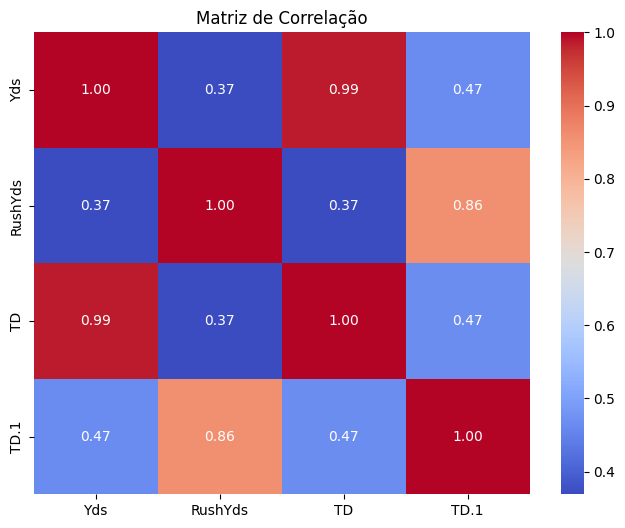

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que você tenha a matriz de correlação (correlation_matrix) do código anterior

# Crie um gráfico de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


In [ ]:
qbruns = df[df['FantPos']=='QB'].sort_values(by='RushYds',ascending = False)[['Player','Age','G','Tm','RushYds','Att','Y/A','TD.1','Year']]

In [ ]:
qbruns.head(10)

,Player,Age,G,Tm,RushYds,Att,Y/A,TD.1,Year
25603,Lamar Jackson,22,15,BAL,1206.0,401.0,6.85,7.0,2019
27592,Justin Fields,23,15,CHI,1143.0,318.0,7.14,8.0,2022
17971,Michael Vick,26,16,ATL,1039.0,388.0,8.45,2.0,2006
26250,Lamar Jackson,23,15,BAL,1005.0,376.0,6.32,7.0,2020
758,Bobby Douglass,25,14,CHI,968.0,198.0,6.87,8.0,1972
9361,Randall Cunningham,27,16,PHI,942.0,465.0,7.98,5.0,1990
16857,Michael Vick,24,15,ATL,902.0,321.0,7.52,3.0,2004
22652,Russell Wilson,26,16,SEA,849.0,452.0,7.19,6.0,2014
26229,Kyler Murray,23,16,ARI,819.0,558.0,6.16,11.0,2020
21475,Robert Griffin III,22,15,WAS,815.0,393.0,6.79,7.0,2012


Acima podemos observar as melhores temporadas de um qb correndo com a bola, considerando a variável Jardas corridas.

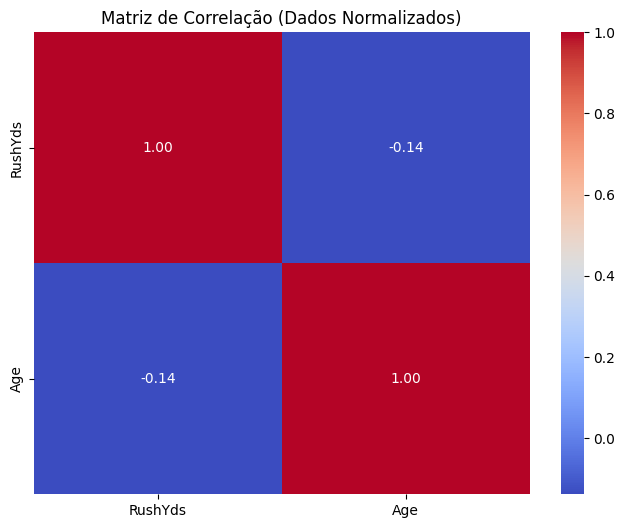

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Suponha que você tenha um DataFrame chamado qb_data_grouped
# Substitua isso pelo nome real do seu DataFrame

# Selecionar apenas as colunas de interesse
subset_df = qbruns[['RushYds', 'Age']]

# Normalizar os dados usando Min-Max Scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(subset_df)

# Criar um DataFrame com os dados normalizados
normalized_df = pd.DataFrame(normalized_data, columns=subset_df.columns)

# Calcular a matriz de correlação dos dados normalizados
correlation_matrix = normalized_df.corr()

# Criar um gráfico de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (Dados Normalizados)')
plt.show()


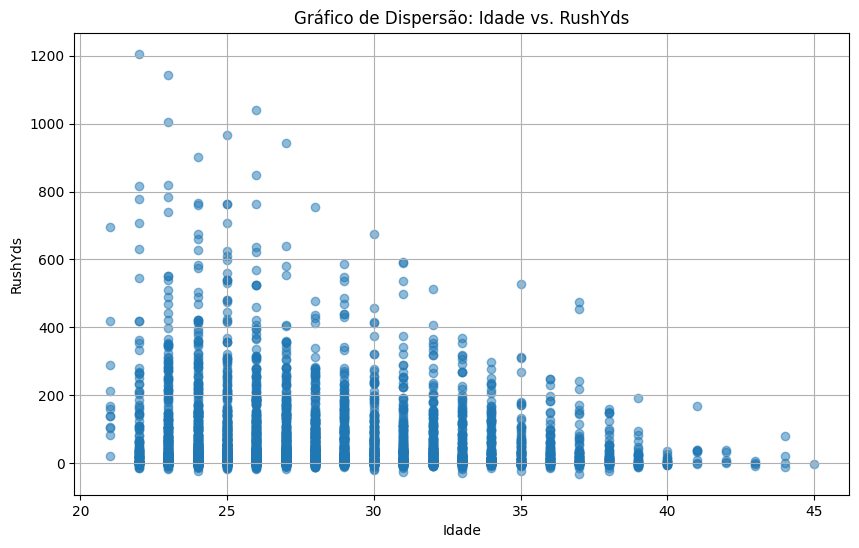

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame chamado qbruns
# Substitua isso pelo nome real do seu DataFrame

# Crie um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(qbruns['Age'], qbruns['RushYds'], alpha=0.5)
plt.xlabel('Idade')
plt.ylabel('RushYds')
plt.title('Gráfico de Dispersão: Idade vs. RushYds')
plt.grid(True)
plt.show()



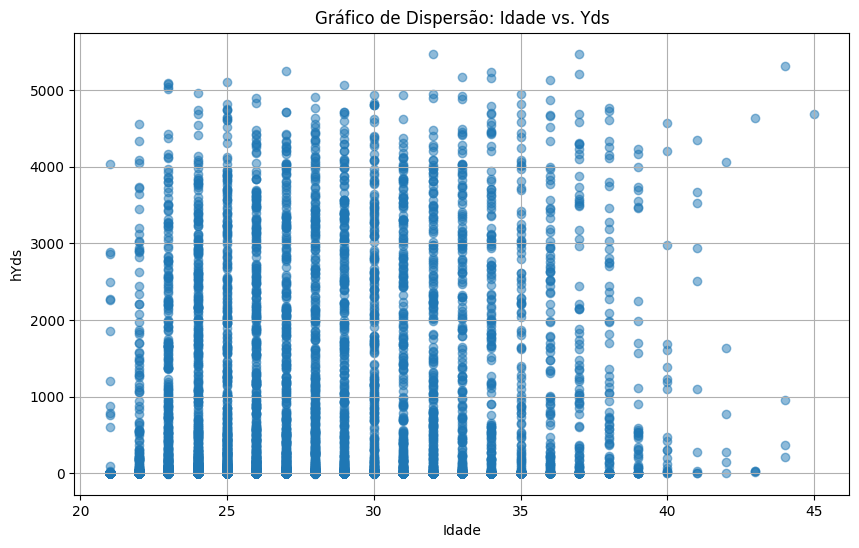

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame chamado qbruns
# Substitua isso pelo nome real do seu DataFrame

# Crie um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Yds'], alpha=0.5)
plt.xlabel('Idade')
plt.ylabel('hYds')
plt.title('Gráfico de Dispersão: Idade vs. Yds')
plt.grid(True)
plt.show()



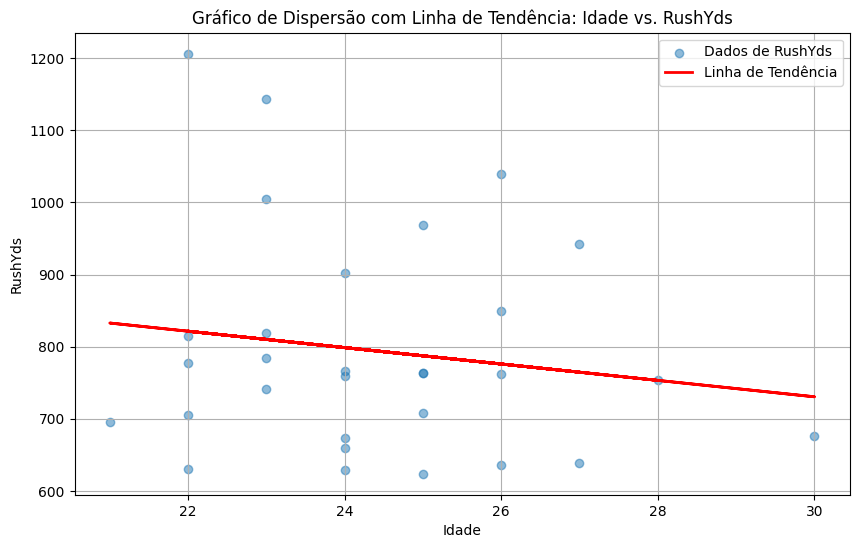

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Suponha que você tenha um DataFrame chamado qbruns
# Substitua isso pelo nome real do seu DataFrame

# Crie um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(qbruns.head(30)['Age'], qbruns.head(30)['RushYds'], alpha=0.5, label='Dados de RushYds')

# Ajuste uma linha de tendência (regressão linear) aos dados
coefficients = np.polyfit(qbruns.head(30)['Age'], qbruns.head(30)['RushYds'], 1)
trendline = np.poly1d(coefficients)
plt.plot(qbruns.head(30)['Age'], trendline(qbruns.head(30)['Age']), color='red', linewidth=2, label='Linha de Tendência')

plt.xlabel('Idade')
plt.ylabel('RushYds')
plt.title('Gráfico de Dispersão com Linha de Tendência: Idade vs. RushYds')
plt.grid(True)
plt.legend()
plt.show()


Como é possível observar, Quarterbacks que possuem características de corredor possuem mais dificuldade para manter o nível e atingem a decadência de sua produção terrestre mais cedo, enquanto que a produção pelo ar se mantém mais constante ao longo dos anos.

In [ ]:
df[df['FantPos']=='TE'].sort_values(by='RecYds',ascending = False)[['Player','RecYds','Rec','Y/R', 'TD.2','Year']].head(10)

,Player,RecYds,Rec,Y/R,TD.2,Year
26225,Travis Kelce,1416.0,105.0,13.49,11.0,2020
25000,George Kittle,1377.0,88.0,15.65,5.0,2018
26886,Mark Andrews,1361.0,107.0,12.72,9.0,2021
27555,Travis Kelce,1338.0,110.0,12.16,12.0,2022
24992,Travis Kelce,1336.0,103.0,12.97,10.0,2018
20869,Rob Gronkowski,1327.0,90.0,14.74,17.0,2011
20876,Jimmy Graham,1310.0,99.0,13.23,11.0,2011
4139,Kellen Winslow,1290.0,89.0,14.49,9.0,1980
16793,Tony Gonzalez,1258.0,102.0,12.33,7.0,2004
5551,Todd Christensen,1247.0,92.0,13.55,12.0,1983


Verificanmos acima as melhores temporadas de TE em relação a jardas recebidas.

In [ ]:
df[df['FantPos']=='WR'].sort_values(by='RecYds',ascending = False)[['Player','RecYds','Rec','Y/R', 'TD.2','Year']].head(10)

,Player,RecYds,Rec,Y/R,TD.2,Year
21460,Calvin Johnson,1964.0,122.0,16.10,5.0,2012
26880,Cooper Kupp,1947.0,145.0,13.43,16.0,2021
23220,Julio Jones,1871.0,136.0,13.76,8.0,2015
11814,Jerry Rice,1848.0,122.0,15.15,15.0,1995
23218,Antonio Brown,1834.0,136.0,13.49,10.0,2015
27552,Justin Jefferson,1809.0,128.0,14.13,8.0,2022
11815,Isaac Bruce,1781.0,119.0,14.97,13.0,1995
25608,Michael Thomas,1725.0,149.0,11.58,9.0,2019
15619,Marvin Harrison,1722.0,143.0,12.04,11.0,2002
27558,Tyreek Hill,1710.0,119.0,14.37,7.0,2022


# 4. Evolução do Jogo

Visando entender a evolução do jogo, vamos fazer um estudo envolvendo a evolução do jogo terrestre e aéreo a fim de comparar quais caminhos a liga vem tomando nos últimos anos.

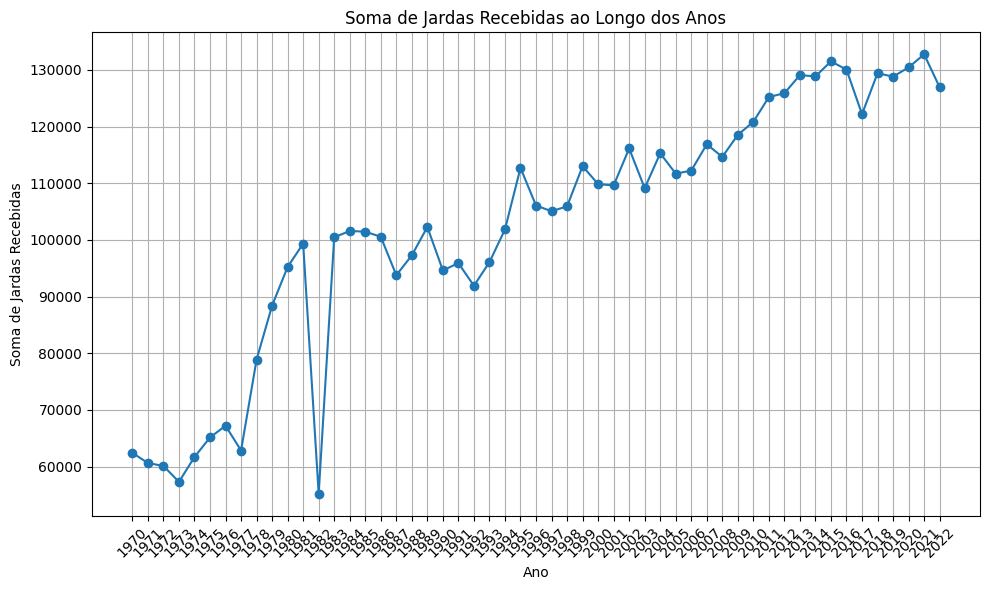

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Agrupe o DataFrame por ano e calcule a soma de 'RecYds' para cada ano
dados_agrupados = df.groupby('Year')['RecYds'].sum()

# Crie o gráfico de linha
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.plot(dados_agrupados.index, dados_agrupados.values, marker='o', linestyle='-')

# Adicione rótulos e título ao gráfico
plt.xlabel('Ano')
plt.ylabel('Soma de Jardas Recebidas')
plt.title('Soma de Jardas Recebidas ao Longo dos Anos')

# Personalize o eixo x para exibir apenas anos inteiros
plt.xticks(dados_agrupados.index, rotation=45)

# Exiba o gráfico
plt.grid(True)  # Adicione grade
plt.tight_layout()  # Ajuste o layout
plt.show()


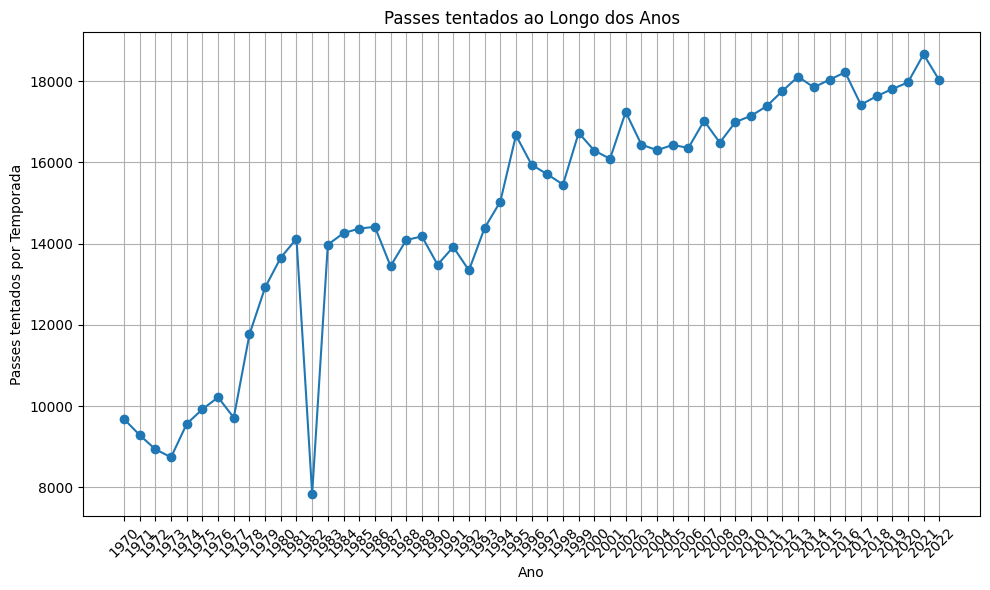

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Agrupe o DataFrame por ano e calcule a soma de 'Att' para cada ano
dados_agrupados = qbruns.groupby('Year')['Att'].sum()

# Crie o gráfico de linha
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.plot(dados_agrupados.index, dados_agrupados.values, marker='o', linestyle='-')

# Adicione rótulos e título ao gráfico
plt.xlabel('Ano')
plt.ylabel('Passes tentados por Temporada')
plt.title('Passes tentados ao Longo dos Anos')

# Personalize o eixo x para exibir apenas anos inteiros
plt.xticks(dados_agrupados.index, rotation=45)

# Exiba o gráfico
plt.grid(True)  # Adicione grade
plt.tight_layout()  # Ajuste o layout
plt.show()


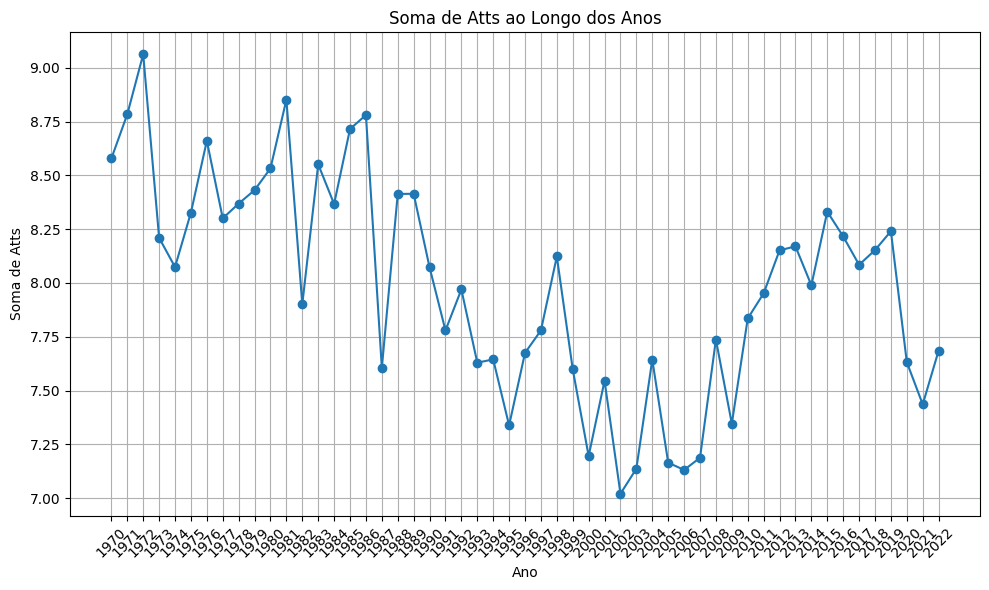

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Agrupe o DataFrame por ano e calcule a soma de 'Yds.2' para cada ano
dados_agrupados = df.groupby('Year')['Y/R'].mean()

# Crie o gráfico de linha
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.plot(dados_agrupados.index, dados_agrupados.values, marker='o', linestyle='-')

# Adicione rótulos e título ao gráfico
plt.xlabel('Ano')
plt.ylabel('Soma de Atts')
plt.title('Soma de Atts ao Longo dos Anos')

# Personalize o eixo x para exibir apenas anos inteiros
plt.xticks(dados_agrupados.index, rotation=45)

# Exiba o gráfico
plt.grid(True)  # Adicione grade
plt.tight_layout()  # Ajuste o layout
plt.show()


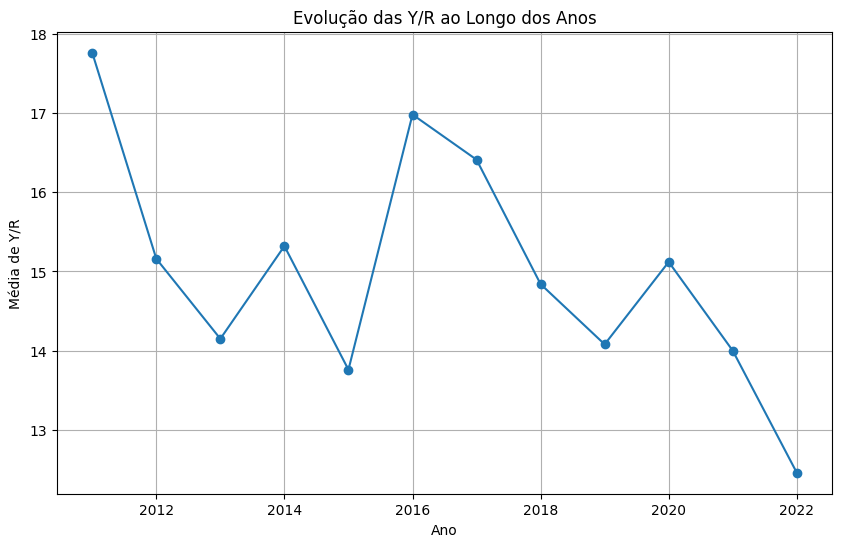

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupe os dados por ano e calcule a média de Y/R para cada ano
yearly_avg_yr = df[df['Player']=='Julio Jones'].groupby('Year')['Y/R'].mean().reset_index()

# Crie um gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_yr['Year'], yearly_avg_yr['Y/R'], marker='o', linestyle='-')
plt.xlabel('Ano')
plt.ylabel('Média de Y/R')
plt.title('Evolução das Y/R ao Longo dos Anos')
plt.grid(True)
plt.show()


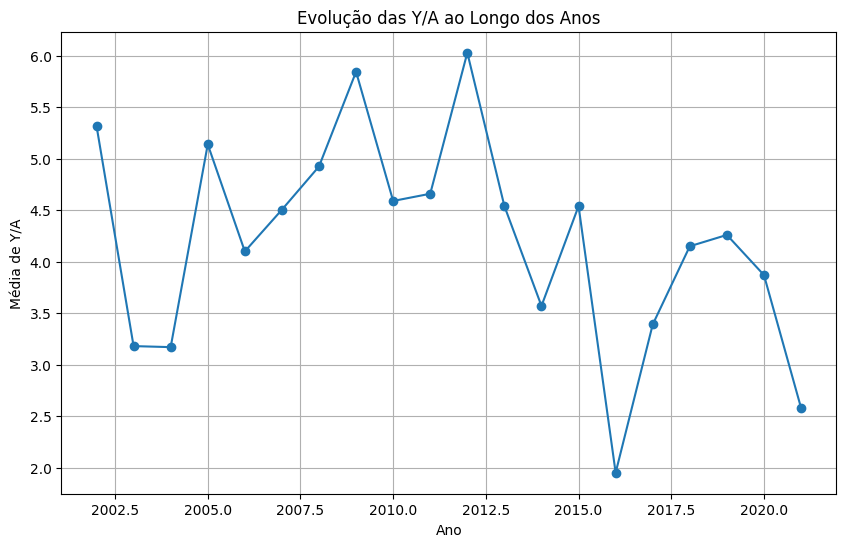

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame chamado df com as colunas 'Y/R' e 'Year'
# Substitua isso pelo nome real do seu DataFrame

# Agrupe os dados por ano e calcule a média de Y/R para cada ano
yearly_avg_yr = df[df['Player']=='Adrian Peterson'].groupby('Year')['Y/A'].mean().reset_index()

# Crie um gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_yr['Year'], yearly_avg_yr['Y/A'], marker='o', linestyle='-')
plt.xlabel('Ano')
plt.ylabel('Média de Y/A')
plt.title('Evolução das Y/A ao Longo dos Anos')
plt.grid(True)
plt.show()


Acima, nos dois gráficos, verificamos a evolução de dois jogadores famosos em suas posições no começo da última década, Julio Jones que fez sucesso pelo Atlanta Falcons e Adrian Peterson conhecido como um dos jogadores da posição mais longíqueo.

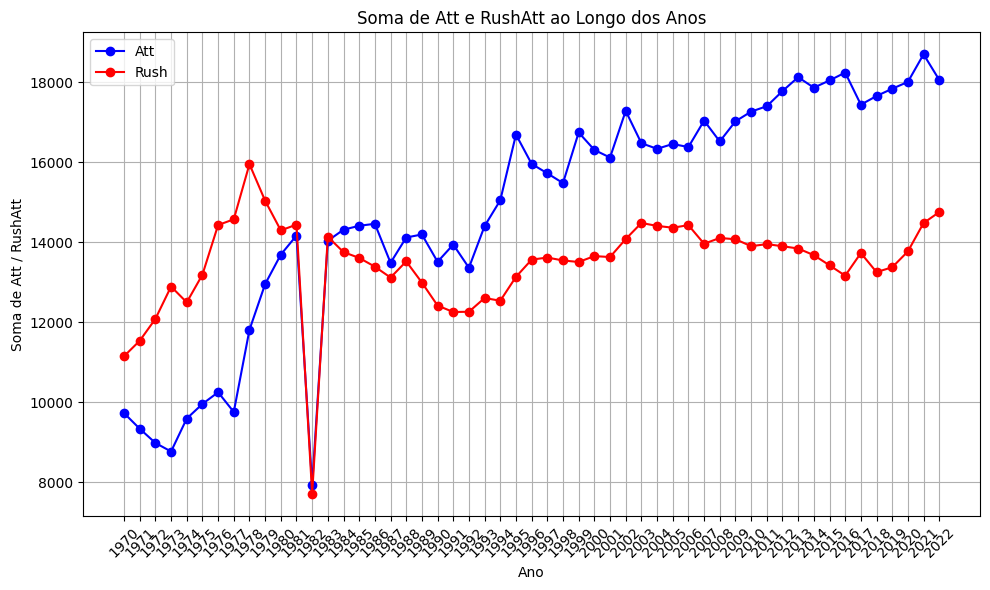

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupe o DataFrame por ano e calcule a soma de 'Att' e 'RushAtt' para cada ano
dados_agrupados = df.groupby('Year')[['Att', 'RushAtt']].sum()

# Crie o gráfico de duas linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Linha para 'Att' com cor azul ('b-')
plt.plot(dados_agrupados.index, dados_agrupados['Att'], label='Att', color='blue', marker='o', linestyle='-')

# Linha para 'RushAtt' com cor vermelha ('r-')
plt.plot(dados_agrupados.index, dados_agrupados['RushAtt'], label='Rush', color='red', marker='o', linestyle='-')

# Adicione rótulos e título ao gráfico
plt.xlabel('Ano')
plt.ylabel('Soma de Att / RushAtt')
plt.title('Soma de Att e RushAtt ao Longo dos Anos')

# Personalize o eixo x para exibir apenas anos inteiros
plt.xticks(dados_agrupados.index, rotation=45)

# Adicione uma legenda para identificar as linhas
plt.legend()

# Exiba o gráfico
plt.grid(True)  # Adicione grade
plt.tight_layout()  # Ajuste o layout
plt.show()


Como é possível observar, o jogo aéreo foi mais presente que o jogo terrestre a partir de 1984 em termos de volume.

# 5. Salvando o conjunto de dados

Com o objetivo de fazer análises de dados mais robustas e mais responsivas em um aplicativo como o power Bi, feita a etl necessária, baixaremos o conjunto de dados utilizado até o momento.

In [ ]:
df.to_excel('nflStats.xlsx', index=False)

In [ ]:
qb_2022=df[(df['FantPos']=='QB') & (df['Year']==2022)]

In [ ]:
qb_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 27548 to 28197
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  83 non-null     int64  
 1   Player      83 non-null     object 
 2   Tm          83 non-null     object 
 3   FantPos     83 non-null     object 
 4   Age         83 non-null     int64  
 5   G           83 non-null     int64  
 6   GS          83 non-null     int64  
 7   Cmp         83 non-null     int64  
 8   Att         83 non-null     int64  
 9   Yds         83 non-null     int64  
 10  TD          83 non-null     int64  
 11  Int         83 non-null     int64  
 12  RushAtt     83 non-null     int64  
 13  RushYds     83 non-null     int64  
 14  Y/A         83 non-null     float64
 15  TD.1        83 non-null     int64  
 16  Rec         83 non-null     int64  
 17  RecYds      83 non-null     int64  
 18  Y/R         83 non-null     float64
 19  TD.2        83 non-null 

In [ ]:
qb_2022['%comp']= qb_2022['Cmp']/qb_2022['Att']
qb_2022['Yds/G']=qb_2022['Yds']/qb_2022['G']
qb_2022['TDs/G']=qb_2022['TD']/qb_2022['G']
qb_2022['TOs/G']=qb_2022['Int']/qb_2022['G']+ qb_2022['FL']/qb_2022['G']

<ipython-input-16-934f3290d478>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_2022['%comp']= qb_2022['Cmp']/qb_2022['Att']
<ipython-input-16-934f3290d478>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_2022['Yds/G']=qb_2022['Yds']/qb_2022['G']
<ipython-input-16-934f3290d478>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
df_2022 = qb_2022[qb_2022['G']>8]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calcula o QB Rating e adiciona-o como uma nova coluna no DataFrame
df_2022['QB Rating'] = (df_2022['%comp'] - 0.3) * 5 + (df_2022['Yds/G'] - 3) * 0.25 + (df_2022['TDs/G'] * 20) - (df_2022['TOs/G'] * 25)

# Calcula a média do QB Rating
media_qb_rating = df_2022['QB Rating'].mean()

# Classifica o DataFrame pelo QB Rating em ordem decrescente (os melhores primeiro)
df_2022 = df_2022.sort_values(by='QB Rating', ascending=False)

# Cria o gráfico de dispersão com nomes dos quarterbacks acima/abaixo da média
plt.figure(figsize=(10, 6))
plt.scatter(df_2022['QB Rating'], df_2022.index, color='b', label='QB Rating')
plt.axvline(x=media_qb_rating, color='r', linestyle='--', label='Média QB Rating')
plt.text(media_qb_rating, -1, f'Média = {media_qb_rating:.2f}', color='r', verticalalignment='bottom', horizontalalignment='left')

for i, row in df_2022.iterrows():
    plt.text(row['QB Rating'], i, row['Player'], color='g' if row['QB Rating'] > media_qb_rating else 'r', verticalalignment='bottom', horizontalalignment='left')

plt.xlabel('PFF Ofensive Grade')
plt.ylabel('EPA per Play')
plt.title('Avaliação de Quarterbacks em 2022')
plt.legend()
plt.grid()
plt.tight_layout()

# Inverte o eixo y para que os melhores estejam no topo
plt.gca().invert_yaxis()

# Mostra o gráfico
plt.show()


<ipython-input-25-9e18e93a95ed>:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
